In [3]:
import cv2
import shutil
import glob,os
import rasterio
import numpy as np
from matplotlib import pyplot as plt
# from tqdm.notebook import tqdm_notebook
from tqdm.notebook import tqdm

def filter_values(values, v_min, v_max):
    # Flatten the array to a single 1D vector
    # See https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html
    flat = np.asanyarray(values).flatten()

    # Now index the values using "boolean indexing"
    # See https://numpy.org/devdocs/reference/arrays.indexing.html#boolean-array-indexing
    return flat[np.logical_and(flat > v_min,
                               flat < v_max)]

def percentile(fp):
    with rasterio.open(fp) as src:
        band = src.read([2])
        # chay percentile

    min = np.nanpercentile(band, 3)
    max = np.nanpercentile(band, 98)

    band[band < min] = 0
    band[band > max] = 255
    img= band.transpose(2,0,1)
    # plt.hist(img.ravel(),256,[0,256])
    # plt.show()
    return img

def draw_histogram(img):
    plt.hist(img.ravel(),256,[0,256])
    plt.show()

def check_value_in_range(value_, range_):
    for id,_ in enumerate(range_[:-1]):
        if range_[id] < value_ < range_[id + 1]:
            return range_[id], range_[id + 1]

def fp_dest(out_dir_class, idx = None, idx_1 = None, ngoai = False):
    if ngoai:
        return os.path.join(out_dir_class,'ngoai')
    else:
        return os.path.join(out_dir_class,f'from{str(idx)}_{str(idx_1)}')

In [4]:
fp_img_origin = r"/home/skm/SKM16/Work/OpenLand/all_tif/20220814_103841_ssc10_u0002_visual.tif"

with rasterio.open(fp_img_origin) as src:
    img = src.read()
    # stand = np.std(img)
# mean = np.mean(img)
# stand = np.std(img)

In [7]:
mean = np.mean(img[2])
mean

71.42088144519911

In [5]:
img_ = filter_values(img[2], 0, 255)
mean = np.mean(img_[2])
mean

135.0

In [10]:
img_ = filter_values(img[2], 132, 142)
mean = np.mean(img_[2])
mean

135.0

In [8]:
stand = np.std(img[2])
stand

78.33922955280309

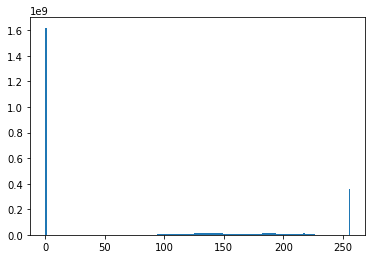

In [2]:

fp_img_origin = r"/home/skm/SKM16/Work/OpenLand/3_dichHistogram/Training_BuildUP/Img_original/20220814_103841_ssc10_u0002_visual.tif"

with rasterio.open(fp_img_origin) as src:
    img = src.read()
draw_histogram(img)



# dir_img = r"/home/skm/SKM16/Work/OpenLand/all_tif"
# list_tif = glob.glob(os.path.join(dir_img,'*.tif'))
# out_dir_class = dir_img + "_sap_xep"
# os.makedirs(out_dir_class, exist_ok=True)
# os.makedirs(fp_dest(out_dir_class, ngoai = True), exist_ok=True)


# range_histogram = [0,90,130,255]
# for id, _ in enumerate(range_histogram[:-1]):
#     os.makedirs(fp_dest(out_dir_class, range_histogram[id], range_histogram[id+1]), exist_ok=True)

# # , desc='Wating ... :'
# for fp in tqdm(list_tif, desc='Wating ... '):

#     img = percentile(fp)
#     filtered_hue = filter_values(img, v_min=0, v_max=255)
#     mean = np.mean(filtered_hue)
#     stand = np.std(filtered_hue)
#     idx, idx_1 = check_value_in_range(mean, range_histogram)
#     if stand >  35:
#         dir_dest = fp_dest(out_dir_class, ngoai = True)
#     else:
#         dir_dest =fp_dest(out_dir_class, idx, idx_1)
#     shutil.copy2(fp, dir_dest)
#     print(dir_dest)
    